<a href="https://colab.research.google.com/github/saso-gatto/Yashi-Game/blob/main/KN_YashiGame.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Yashi Game**

Project for "Knowledge Representation and Learning" course at University of Padua.

Salvatore Gatto, 2044587


**The Game**

An instance of the Yashi game is specifid by a n × n integer grid for some n > 2, on which p > 2 nodes are placed. A solution of the game consists in drawing horizontal and vertical segments, satisfying the following conditions:
1. No two segments cross each other.
2. The segments form a tree, i.e., they form a graph without cycles. Put differently
still, for every two nodes a and b there is exactly one path between a and b

**Rules in details**

In Yashi Games, you can connect any two dots by using a single horizontal or single vertical line. You cannot use any diagonal lines or curved lines, and you cannot connect two dots with a path that has angles or corners. No L-shapes, no Z-shapes, just single straight lines. Each dot may be connected to 1, 2, 3 or 4 other dots, either horizontally, vertically or both. Your lines cannot cross each other, and they cannot pass through other dots, or go on top of other lines. 

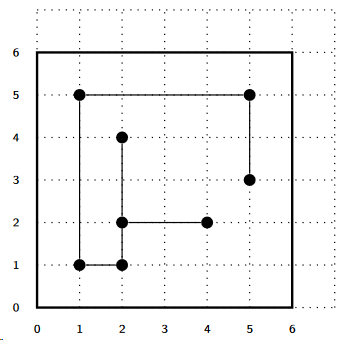


**SAT PROJECT**

Given an instance G of Yashi, develop a SAT based method to answer the following questions:
1. Decide if there is a solution for G. If there is, return one solution.
2. Decide if there is a solution for G. If there is, return a minimum-length solution.

Idea: riprodurre un sistema di assi cartesiani X,Y.

In [ ]:
!pip install python-sat

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pysat.formula import WCNF
from pysat.solvers import Minisat22
from pysat.examples.fm import FM

from itertools import chain
from collections import defaultdict, deque
from io import StringIO
from typing import List, Set, Dict, NewType, Tuple
import random
import math
import matplotlib.pyplot as plt

In [ ]:
class Point:
  def __init__ (self, x:float, y:float):
    self.x = x
    self.y =y

  def get_x(self):
    return self.x

  def get_y(self):
    return self.y

  def set_x(self, x:float):
    self.x = x
  
  def set_y(self, y:float):
    self.y = y

  def __str__(self) -> str:
    return "("+str(self.x)+","+str(self.y)+")"

In [ ]:
class Line:
  def __init__(self,p1,p2):
    self.p1 = p1
    self.p2 = p2

  def get_p1(self):
    return self.p1
  
  def get_p2(self):
    return self.p2

  def set_p1 (self,p):
    self.p1 = p
  
  def set_p2 (self,p):
    self.p2 = p
  
  def print(self):
    print(f"{self.p1} ----- {self.p2}")

In [ ]:
# Creation of 3 dots such as (0,2), (4,2), (0,5)
p1 = Point (0,2) 
p2 = Point (4,2)
p3 = Point(0,5)

In [ ]:
first_line = Line(p1,p2)
first_line.print()

(0,2) ----- (4,2)


In [ ]:
SIZE = 5

def generate_cartesian_plane(points,lines):
  # prepare the empty content
  rows = 10
  cols = 10
  content = [["."]*cols for _ in range(rows)]

  # assign values at coordinates as needed (based on your grid)
  #content[5][8]  = "O"
  #grid = [(4,1,"H"),(6,3,"L"),(5,2,"E"),(4,6,"R"),(7,4,"L"),(6,6,"W"),(3,6,"L"),(2,6,"D"),(5,6,"O")]
  #for (y,x,c) in grid: content[y][x] = c
  for i in range (len(points)):
    y = points[i].get_y()
    x = points[i].get_x()
    content[y][x] = "O"

  for i in range (len(lines)):
    print("---- Current line -----")
    print(lines[i].get_p1())
    print(lines[i].get_p2())
    if (lines[i].get_p1().x == lines[i].get_p2().x):
      if (lines[i].get_p1().y<lines[i].get_p2().y  ):
        initial_value = lines[i].get_p1().y+1
        final_value = lines[i].get_p2().y  
      else:
        initial_value = lines[i].get_p2().y+1
        final_value = lines[i].get_p1().y  
      current_x = lines[i].get_p1().x
      for v in range (initial_value,final_value):
        content[v][current_x] = "|"
    elif (lines[i].get_p1().y == lines[i].get_p2().y):
      if (lines[i].get_p1().x<lines[i].get_p2().x):
        initial_value = lines[i].get_p1().x+1
        final_value = lines[i].get_p2().x  
      else:
        initial_value = lines[i].get_p2().x+1
        final_value = lines[i].get_p1().x  
      current_y = lines[i].get_p1().y
      for v in range (initial_value,final_value):
        print(f"Initial_value: {initial_value},final_val: {final_value}, current: {v}, y:{current_y}")
        content[current_y][v] = "-"


  # build frame
  width       = len(str(max(rows,cols)-1))
  contentLine = "# | values |"

  dashes      = "-".join("-"*width for _ in range(cols))
  frameLine   = contentLine.replace("values",dashes)
  frameLine   = frameLine.replace("#"," "*width)
  frameLine   = frameLine.replace("| ","+-").replace(" |","-+")

  # print grid
  print(frameLine)
  for i,row in enumerate(reversed(content),1):
      values = " ".join(f"{v:{width}s}" for v in row)
      line   = contentLine.replace("values",values)
      line   = line.replace("#",f"{rows-i:{width}d}")
      print(line)
  print(frameLine)

  # x-axis numbers
  numLine = contentLine.replace("|"," ")
  numLine = numLine.replace("#"," "*width)
  colNums = " ".join(f"{i:<{width}d}" for i in range(cols))
  numLine = numLine.replace("values",colNums)
  print(numLine)

In [ ]:
print(p1,p2,p3)
points = [p1,p2,p3]
first_line = Line(p1,p2)
second_line = Line(p1,p3)
lines = [first_line,second_line]
generate_cartesian_plane(points,lines)

(0,2) (4,2) (0,5)
---- Current line -----
(0,2)
(4,2)
Initial_value: 1,final_val: 4, current: 1, y:2
Initial_value: 1,final_val: 4, current: 2, y:2
Initial_value: 1,final_val: 4, current: 3, y:2
---- Current line -----
(0,2)
(0,5)
  +---------------------+
9 | . . . . . . . . . . |
8 | . . . . . . . . . . |
7 | . . . . . . . . . . |
6 | . . . . . . . . . . |
5 | O . . . . . . . . . |
4 | | . . . . . . . . . |
3 | | . . . . . . . . . |
2 | O - - - O . . . . . |
1 | . . . . . . . . . . |
0 | . . . . . . . . . . |
  +---------------------+
    0 1 2 3 4 5 6 7 8 9  


In [ ]:
def plot_graph(points, lines):
  # Create a figure and axis
  fig, ax = plt.subplots()

  # Set the range of x and y values
  x_values = range(0, 11)
  y_values = range(0, 11)

  # Set the x and y axis limits with offset
  ax.set_xlim(0, 11)
  ax.set_ylim(0, 11)

  # Set the x and y axis labels
  ax.set_xlabel('X')
  ax.set_ylabel('Y')

  # Set the aspect ratio to 'equal' for a square plot
  ax.set_aspect('equal')

  # Add grid lines
  ax.set_xticks(x_values)
  ax.set_yticks(y_values)
  ax.grid(True, which='both')

  for point in (points):
    # Add a point at (3, 4) with red color
    ax.scatter(point.x, point.y, color='red')
  
  for line in (lines):
    print("---- Current line -----")
    print(line.get_p1())
    print(line.get_p2())
    # Plot a line segment between the two points
    x1 = line.get_p1().x
    x2 = line.get_p2().x
    y1 = line.get_p1().y
    y2 = line.get_p2().y
    ax.plot([x1,x2], [y1,y2], color='blue')


  # Show the plot
  plt.show()

---- Current line -----
(1,3)
(8,3)
---- Current line -----
(1,3)
(1,7)


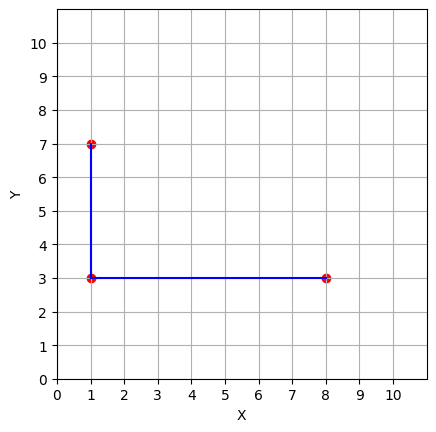

In [ ]:
# Creation of 3 dots such as (0,2), (4,2), (0,5)
p1 = Point (1,3) 
p2 = Point (8,3)
p3 = Point(1,7)

points = [p1,p2,p3]
first_line = Line(p1,p2)
second_line = Line(p1,p3)
lines = [first_line,second_line]

plot_graph(points,lines)

(9,5)
(4,1)
(7,7)
(6,3)
(8,4)


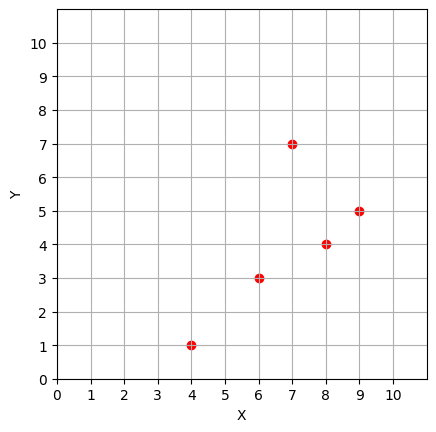

In [ ]:
points = []
for i in range(5):
  x = random.randint(1,9)
  y = random.randint(1,9)
  p = Point(x,y)
  print(p)
  points.append(p)

plot_graph(points,[])

# **Graph**

By following the explaination contained on the [paper](https://www.cs.bu.edu/faculty/kfoury/UNI-Teaching/CS512/AK_Documents/Modeling-with-PL/main.pdf) provided by the professor, my idea is to build a graph using the points of yashi game and check whether the following graph is connected or not.

So, let's first create a class Graph, and then a method to check this property.
The best way to represent a graph is to use the adjacency matrix.

**Graph data structure**


We implemented a class Graph in the following way:
* self.V: list of vertices of the graph.
* self.E: dictionary representing the edges of the graph. The keys of the dictionary are the tuples of the adjacent nodes (v1,v2) and the values are the respective weights.
* self.adjacency_list: default dictionary to represent the graph as an adjacency
list.

The class Graph also contains the following methods:
* def add_vertex(self,v): the method adds the vertex “v” to the list of vertices of the graph.
* def remove_vertex(self,v): the method removes the vertex “v” from the list of
vertices of the graph.
* def add_edge(self, source_node, destination_node, weight): the method adds
the edge (source_node, destination_node) with its weight to the dictionary
graph.E. If source_node and destination_node are not inside the list of the
vertices of the Graph, the method also updates the variable self.V. The graph is
also updated appending the new edge to the adjacency list.

* def get_edge(self,v1,v2): the method returns the weight of the edge (v1,v2) by
accessing the dictionary graph.E

In [ ]:
class Graph():
  def __init__ (self):
    self.V=[]
    self.E= defaultdict(list)
    self.adjacency_list = defaultdict(list)

  def add_vertex(self,v):
    self.V.append(v)

  def remove_vertex (self,v):
    self.V.remove(v)

  def add_edge(self, source_node, destination_node, weight):
    # First case
    # We add the source and the destination node only if the are not already present
    if (source_node not in self.V):
      self.V.append(source_node)
    
    if (destination_node not in self.V):
      self.V.append(destination_node)
    
    # Now we can add the edge
    #edge = (source_node.vertex, destination_node.vertex, weight)
    self.E[(source_node,destination_node)] = weight

    # Now we update the graph
    self.adjacency_list[source_node].append((destination_node,weight))
    if (source_node != destination_node):
      self.adjacency_list[destination_node].append((source_node,weight))

  def get_edge(self, v1,v2):
    if((v1,v2) in self.E):
      return self.E.get((v1,v2))
    else:
      return self.E.get((v2,v1))